In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stocks.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(248, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [5]:
df.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [6]:
df.isnull().any()

,0
Ticker,False
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


In [7]:
df["Ticker"].value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

Plots

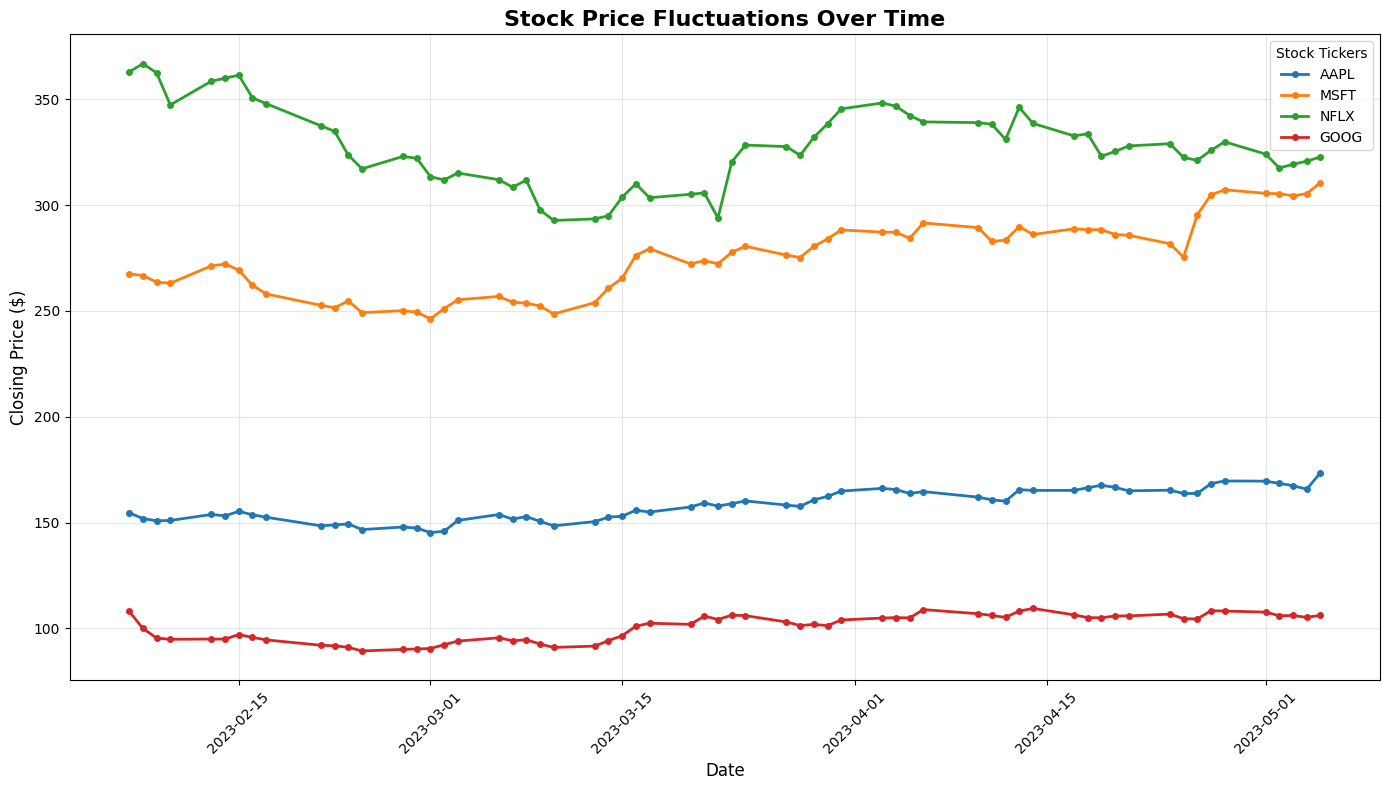

In [9]:
# Line plot for stock price fluctuations
plt.figure(figsize=(14, 8))

# Get unique tickers
tickers = df['Ticker'].unique()

# Plot each stock's closing price over time
for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker].sort_values('Date')
    plt.plot(ticker_data['Date'], ticker_data['Close'],
             marker='o', markersize=4, linewidth=2, label=ticker)

# Customize the plot
plt.title('Stock Price Fluctuations Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(title='Stock Tickers', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

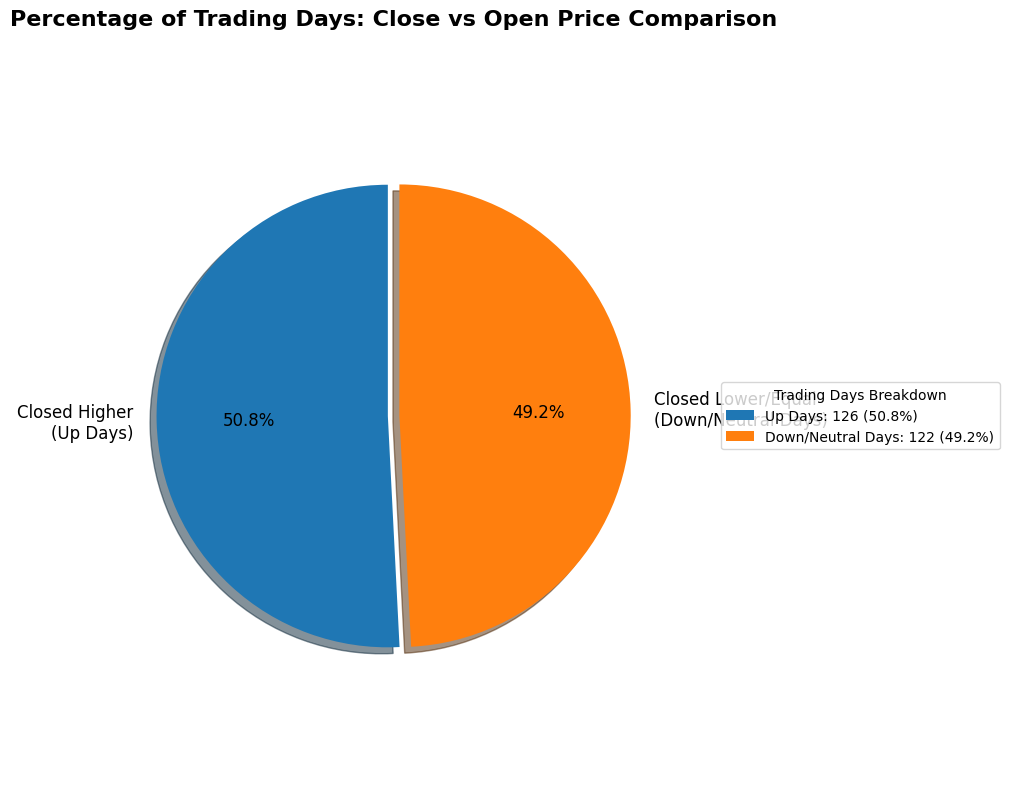

In [10]:
# Pie chart to view for how many percent of days prices closed higher than they opened
df['up_days'] = df['Close'] > df['Open']

# Count up_days (close>open) vs down_days(close<=open) days
up_days = df['up_days'].sum()
down_days = len(df) - up_days

# Calculate percentages
total_days = len(df)
up_days_percent = (up_days / total_days) * 100
down_days_percent = (down_days / total_days) * 100

# Create pie chart
plt.figure(figsize=(10, 8))

labels = ['Closed Higher\n(Up Days)', 'Closed Lower/Equal\n(Down/Neutral Days)']
sizes = [up_days, down_days]
explode = (0.05, 0)  # Slightly separate the Up Days slice

# Create the pie chart
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True,
                                   startangle=90, textprops={'fontsize': 12})

# Customize the chart
plt.title('Percentage of Trading Days: Close vs Open Price Comparison',
          fontsize=16, fontweight='bold', pad=20)

# Add a legend with actual counts
legend_labels = [f'Up Days: {up_days} ({up_days_percent:.1f}%)',
                f'Down/Neutral Days: {down_days} ({down_days_percent:.1f}%)']
plt.legend(wedges, legend_labels, title="Trading Days Breakdown",
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


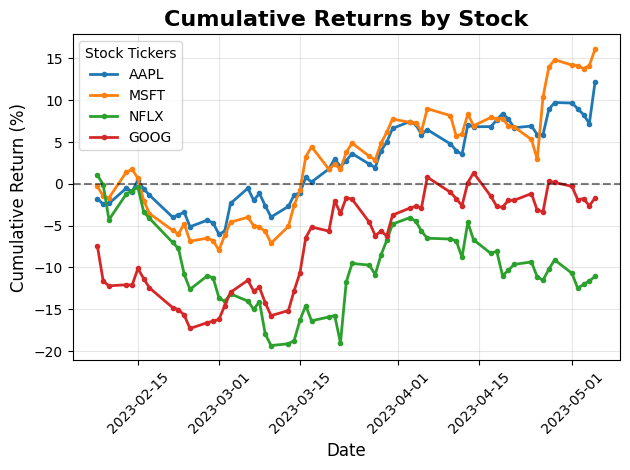

In [11]:
# Line plot for cumulative returns
# Calculate and plot cumulative returns for each stock
for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker].sort_values('Date').copy()

    # Calculate daily returns
    ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()

    # Calculate cumulative return (starting from 0%)
    ticker_data['Cumulative_Return'] = (1 + ticker_data['Daily_Return']).cumprod() - 1

    # Plot cumulative return as percentage
    plt.plot(ticker_data['Date'], ticker_data['Cumulative_Return'] * 100,
             marker='o', markersize=3, linewidth=2, label=ticker)

# Customize the plot
plt.title('Cumulative Returns by Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(title='Stock Tickers', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add a horizontal line at 0% for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.show()

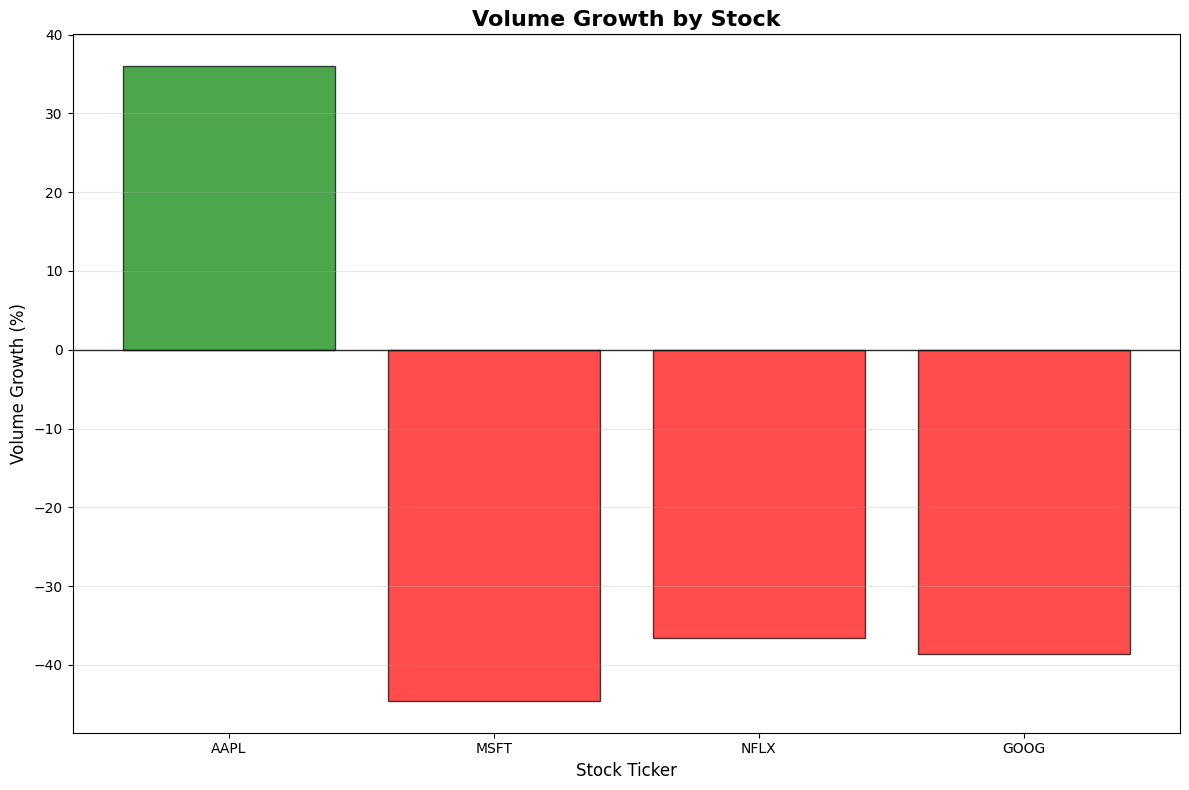

In [12]:
# Volume growth for each stock
volume_growth_data = []
for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker].sort_values('Date')

    # Get first and last volume values
    initial_volume = ticker_data['Volume'].iloc[0]
    final_volume = ticker_data['Volume'].iloc[-1]

    # Calculate volume growth percentage
    volume_growth = ((final_volume - initial_volume) / initial_volume) * 100

    volume_growth_data.append({
        'Ticker': ticker,
        'Volume_Growth': volume_growth,
        'Initial_Volume': initial_volume,
        'Final_Volume': final_volume
    })

# Create DataFrame for easier plotting
volume_df = pd.DataFrame(volume_growth_data)

# Create bar graph
plt.figure(figsize=(12, 8))

# Create bars with different colors for positive and negative growth
colors = ['green' if growth >= 0 else 'red' for growth in volume_df['Volume_Growth']]

bars = plt.bar(volume_df['Ticker'], volume_df['Volume_Growth'],
               color=colors, alpha=0.7, edgecolor='black', linewidth=1)

# Customize the plot
plt.title('Volume Growth by Stock', fontsize=16, fontweight='bold')
plt.xlabel('Stock Ticker', fontsize=12)
plt.ylabel('Volume Growth (%)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Add a horizontal line at 0% for reference
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Rotate x-axis labels if needed
plt.xticks(rotation=45 if len(tickers) > 5 else 0)

plt.tight_layout()
plt.show()

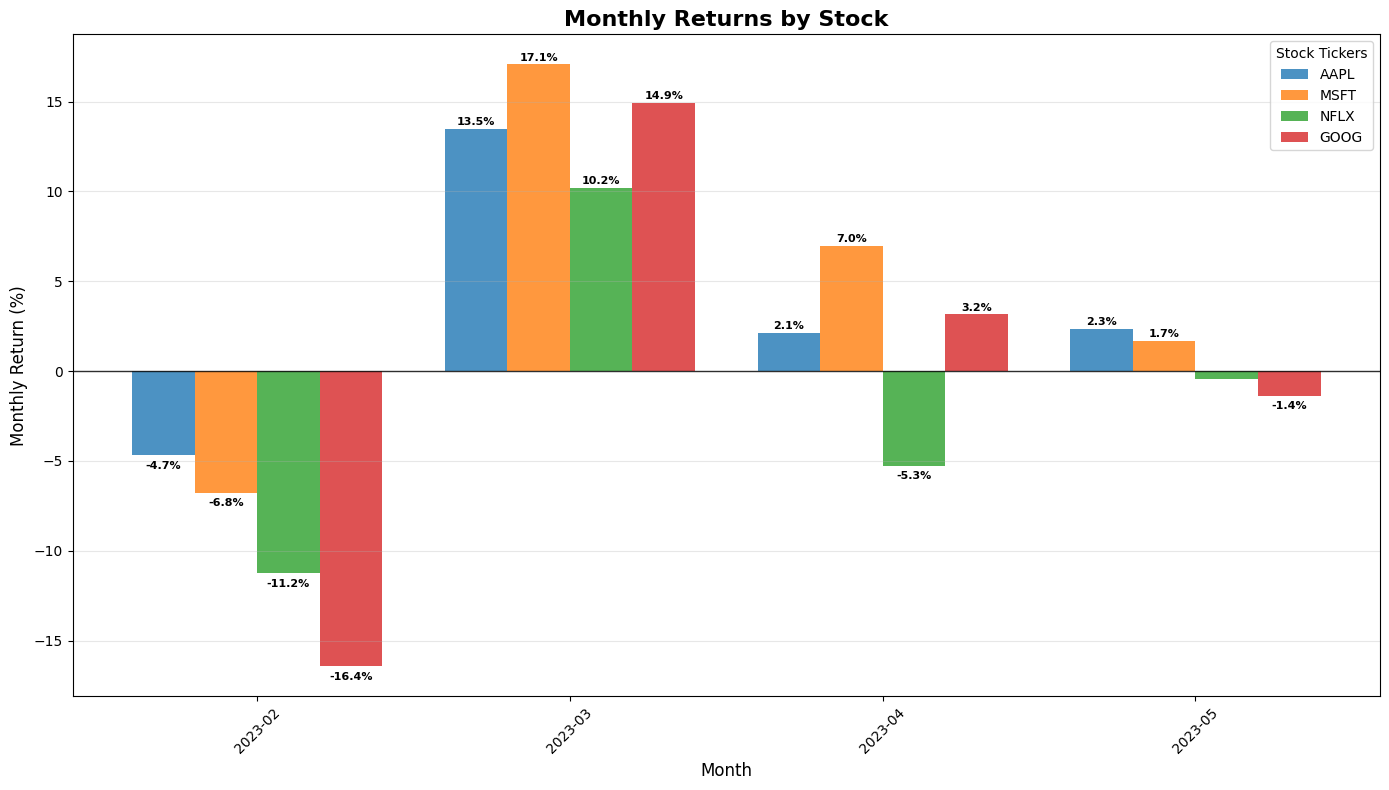

In [13]:
# Monthly returns for each stock
monthly_returns = []
for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker].copy()
    ticker_data['Date'] = pd.to_datetime(ticker_data['Date'])
    ticker_data = ticker_data.sort_values('Date')

    # Group by year-month
    ticker_data['YearMonth'] = ticker_data['Date'].dt.to_period('M')

    # Calculate monthly returns
    for period in ticker_data['YearMonth'].unique():
        period_data = ticker_data[ticker_data['YearMonth'] == period]

        if len(period_data) > 0:
            # Get first and last price of the month
            first_price = period_data['Close'].iloc[0]
            last_price = period_data['Close'].iloc[-1]

            # Calculate monthly return
            monthly_return = ((last_price - first_price) / first_price) * 100

            monthly_returns.append({
                'Ticker': ticker,
                'Month': str(period),
                'Return': monthly_return
            })

# Create DataFrame
monthly_df = pd.DataFrame(monthly_returns)

# Pivot data for grouped bar chart
pivot_df = monthly_df.pivot(index='Month', columns='Ticker', values='Return')
pivot_df = pivot_df.fillna(0)  # Fill any missing values with 0

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set the width of bars and positions
bar_width = 0.8 / len(tickers)
x = np.arange(len(pivot_df.index))

# Create bars for each stock
for i, ticker in enumerate(tickers):
    bars = ax.bar(x + i * bar_width, pivot_df[ticker], bar_width,
                  label=ticker, alpha=0.8)

    # Add value labels on bars (only if return is significant)
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 1:  # Only label significant returns
            ax.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height >= 0 else -0.3),
                   f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top',
                   fontsize=8, fontweight='bold')

# Customize the plot
ax.set_title('Monthly Returns by Stock', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Monthly Return (%)', fontsize=12)
ax.set_xticks(x + bar_width * (len(tickers) - 1) / 2)
ax.set_xticklabels(pivot_df.index, rotation=45)
ax.legend(title='Stock Tickers', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Add horizontal line at 0%
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

plt.tight_layout()
plt.show()